## Tugas: Eksperimen HDBSCAN

Lakukan eksperimen clustering dengan HDBSCAN menggunakan dataset yang Anda pilih. Lakukan hal berikut:

    - Load dan eksplorasi dataset
    - Lakukan preprocessing jika diperlukan (normalisasi, dll)
    - Jalankan HDBSCAN dengan berbagai parameter
    - Evaluasi hasil menggunakan Silhouette Score dan Davies-Bouldin Index
    - Visualisasikan hasil clustering
    - Bandingkan dengan DBSCAN atau K-Means



EKSPERIMEN: HDBSCAN PADA DATA MAKE_MOONS

1. DATASET
------------------------------------------------------------------------------------------
Jumlah sampel  : 1000
Dimensi fitur  : 2
Jumlah label asli: 2

2. NORMALISASI
------------------------------------------------------------------------------------------
Rata-rata per fitur : [-2.45969911e-16 -3.07642800e-16]
Standar deviasi     : [1. 1.]


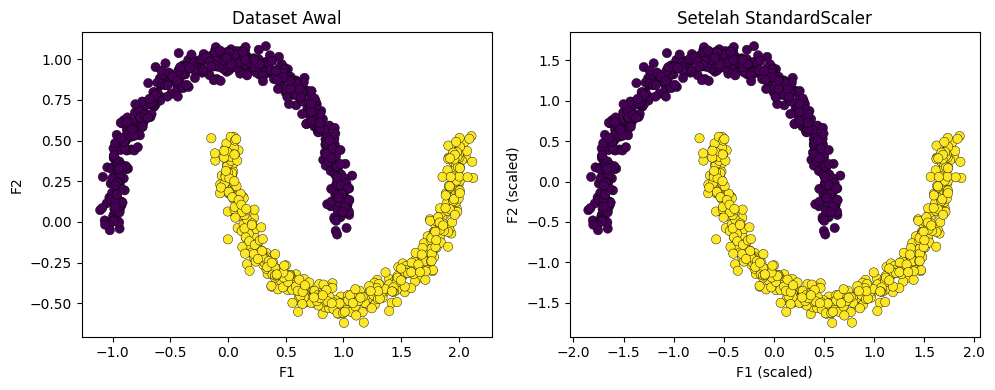


3. EKSPLORASI PARAMETER HDBSCAN
------------------------------------------------------------------------------------------
mcs= 5, ms= 1 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs= 5, ms= 5 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs= 5, ms=10 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs=10, ms= 1 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs=10, ms= 5 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs=10, ms=10 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs=15, ms= 1 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs=15, ms= 5 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs=15, ms=10 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs=20, ms= 1 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs=20, ms= 5 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186
mcs=20, ms=10 | cluster=2, noise=  0 ( 0.0%), sil=0.3912, dbi=1.0186

4. RINGKASAN HASIL
----------------------------

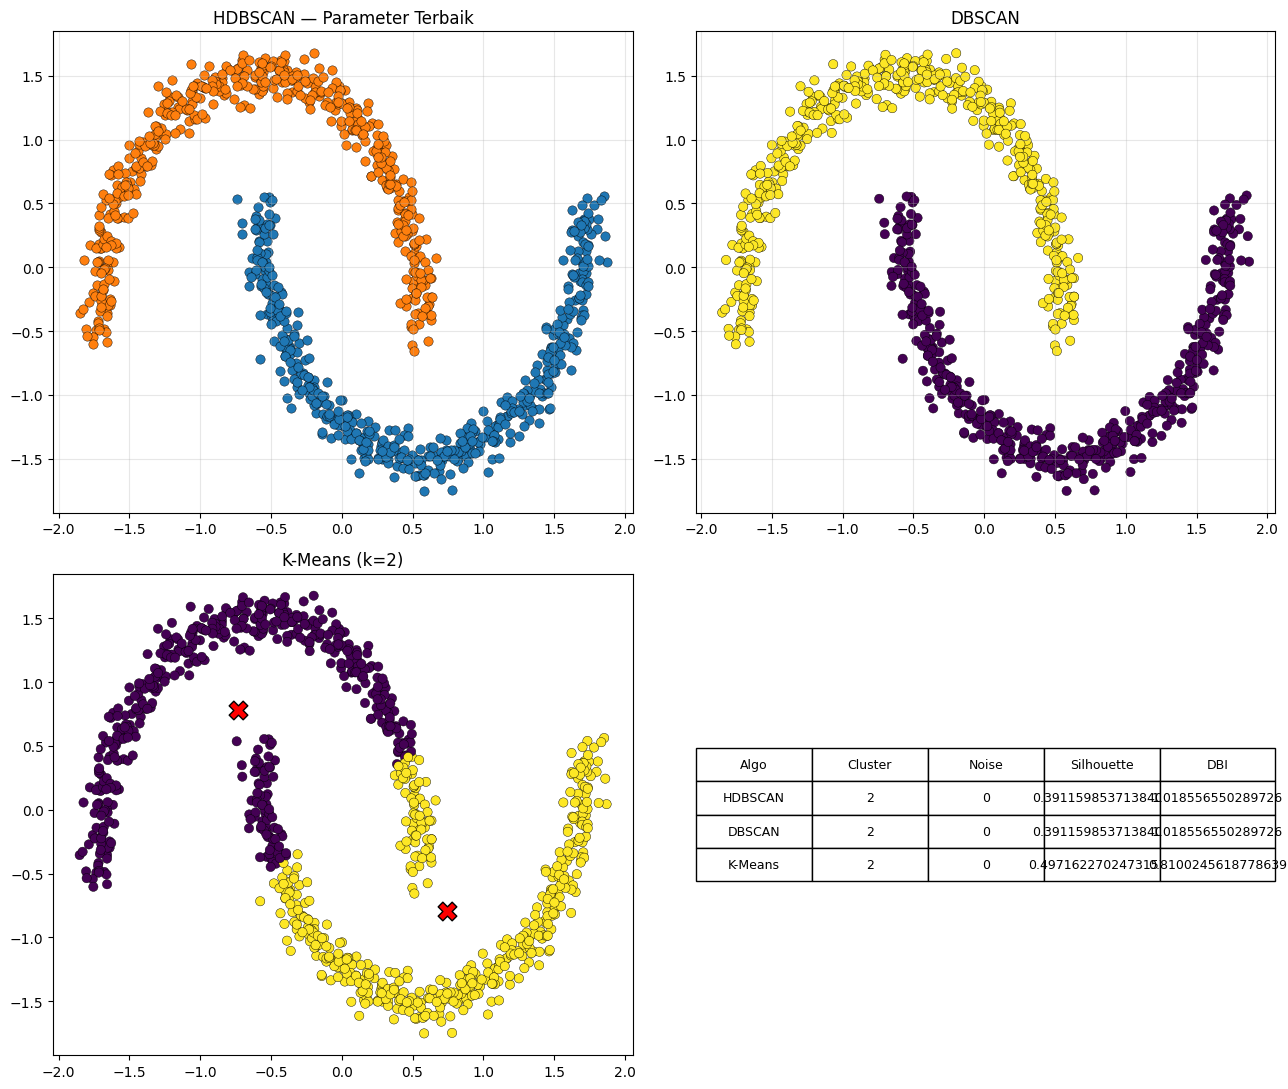


Tabel Perbandingan:
   Algo  Cluster  Noise  Silhouette      DBI
HDBSCAN        2      0    0.391160 1.018557
 DBSCAN        2      0    0.391160 1.018557
K-Means        2      0    0.497162 0.810025

Metode dengan performa terbaik: K-Means


In [1]:
# Eksperimen HDBSCAN — Versi Modifikasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

# pastikan modul hdbscan tersedia
try:
    import hdbscan
except:
    import subprocess
    subprocess.check_call(["pip", "install", "hdbscan"])
    import hdbscan

print("="*90)
print("EKSPERIMEN: HDBSCAN PADA DATA MAKE_MOONS")
print("="*90)

# -------------------------------------------------------------------------
# 1. Dataset
# -------------------------------------------------------------------------
print("\n1. DATASET")
print("-"*90)

X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
print(f"Jumlah sampel  : {len(X)}")
print(f"Dimensi fitur  : {X.shape[1]}")
print(f"Jumlah label asli: {len(set(y_true))}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y_true, cmap="viridis",
            s=45, edgecolors="k", linewidths=0.3)
plt.title("Dataset Awal")
plt.xlabel("F1")
plt.ylabel("F2")

# -------------------------------------------------------------------------
# 2. Normalisasi
# -------------------------------------------------------------------------
print("\n2. NORMALISASI")
print("-"*90)

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

print("Rata-rata per fitur :", X_norm.mean(axis=0))
print("Standar deviasi     :", X_norm.std(axis=0))

plt.subplot(1,2,2)
plt.scatter(X_norm[:,0], X_norm[:,1], c=y_true, cmap="viridis",
            s=45, edgecolors="k", linewidths=0.3)
plt.title("Setelah StandardScaler")
plt.xlabel("F1 (scaled)")
plt.ylabel("F2 (scaled)")
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# 3. HDBSCAN: eksplorasi parameter
# -------------------------------------------------------------------------
print("\n3. EKSPLORASI PARAMETER HDBSCAN")
print("-"*90)

mcs_list = [5, 10, 15, 20]
ms_list = [1, 5, 10]

records = []

for mcs in mcs_list:
    for ms in ms_list:
        model = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples=ms)
        labels = model.fit_predict(X_norm)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_count = np.sum(labels == -1)

        # evaluasi hanya jika cluster >= 2 dan data tidak seluruhnya noise
        if n_clusters >= 2:
            mask = labels != -1
            if mask.sum() > 1:
                sil = silhouette_score(X_norm[mask], labels[mask])
                dbi = davies_bouldin_score(X_norm[mask], labels[mask])
            else:
                sil, dbi = 0, 0
        else:
            sil, dbi = 0, 0

        records.append({
            "min_cluster_size": mcs,
            "min_samples": ms,
            "clusters": n_clusters,
            "noise": noise_count,
            "noise_pct": noise_count / len(X_norm) * 100,
            "silhouette": sil,
            "dbi": dbi
        })

        print(f"mcs={mcs:2d}, ms={ms:2d} | cluster={n_clusters}, noise={noise_count:3d} "
              f"({noise_count/len(X_norm)*100:4.1f}%), sil={sil:.4f}, dbi={dbi:.4f}")

df_res = pd.DataFrame(records)

# -------------------------------------------------------------------------
# 4. Ringkasan hasil
# -------------------------------------------------------------------------
print("\n4. RINGKASAN HASIL")
print("-"*90)

print(df_res.to_string(index=False))

best_row = df_res.iloc[df_res["silhouette"].idxmax()]
print("\nParameter terbaik berdasarkan Silhouette:")
print(f"  min_cluster_size : {int(best_row.min_cluster_size)}")
print(f"  min_samples      : {int(best_row.min_samples)}")
print(f"  Silhouette       : {best_row.silhouette:.4f}")
print(f"  DBI              : {best_row.dbi:.4f}")

# final run
best_model = hdbscan.HDBSCAN(
    min_cluster_size=int(best_row.min_cluster_size),
    min_samples=int(best_row.min_samples)
)
best_labels = best_model.fit_predict(X_norm)

# -------------------------------------------------------------------------
# 5. Visualisasi HDBSCAN
# -------------------------------------------------------------------------
print("\n5. VISUALISASI")
print("-"*90)

fig, axs = plt.subplots(2, 2, figsize=(13, 11))

# HDBSCAN
axs[0,0].set_title("HDBSCAN — Parameter Terbaik")
for label in set(best_labels):
    color = "black" if label == -1 else None
    idx = best_labels == label
    axs[0,0].scatter(X_norm[idx,0], X_norm[idx,1],
                     s=45, edgecolors="k", linewidths=0.3,
                     c=color)
axs[0,0].grid(alpha=0.3)

# -------------------------------------------------------------------------
# 6. Perbandingan: DBSCAN & K-Means
# -------------------------------------------------------------------------
print("\n6. PERBANDINGAN DENGAN METODE LAIN")
print("-"*90)

# DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
db_labels = db.fit_predict(X_norm)
mask_db = db_labels != -1
c_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)
noise_db = np.sum(db_labels == -1)
sil_db = silhouette_score(X_norm[mask_db], db_labels[mask_db]) if c_db >= 2 else 0
dbi_db = davies_bouldin_score(X_norm[mask_db], db_labels[mask_db]) if c_db >= 2 else 0

print(f"DBSCAN: cluster={c_db}, noise={noise_db}, sil={sil_db:.4f}, dbi={dbi_db:.4f}")

axs[0,1].set_title("DBSCAN")
axs[0,1].scatter(X_norm[:,0], X_norm[:,1], c=db_labels, cmap="viridis",
                 s=45, edgecolors="k", linewidths=0.3)
axs[0,1].grid(alpha=0.3)

# K-Means
km = KMeans(n_clusters=2, random_state=42, n_init=10)
km_labels = km.fit_predict(X_norm)
sil_km = silhouette_score(X_norm, km_labels)
dbi_km = davies_bouldin_score(X_norm, km_labels)

print(f"K-Means: cluster=2, noise=0, sil={sil_km:.4f}, dbi={dbi_km:.4f}")

axs[1,0].set_title("K-Means (k=2)")
axs[1,0].scatter(X_norm[:,0], X_norm[:,1], c=km_labels, cmap="viridis",
                 s=45, edgecolors="k", linewidths=0.3)
axs[1,0].scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
                 c="red", marker="X", s=180, edgecolors="black")

# tabel ringkas
summary = pd.DataFrame({
    "Algo": ["HDBSCAN", "DBSCAN", "K-Means"],
    "Cluster": [int(best_row.clusters), c_db, 2],
    "Noise": [int(best_row.noise), noise_db, 0],
    "Silhouette": [best_row.silhouette, sil_db, sil_km],
    "DBI": [best_row.dbi, dbi_db, dbi_km]
})

axs[1,1].axis("off")
tbl = axs[1,1].table(
    cellText=summary.values,
    colLabels=summary.columns,
    cellLoc="center",
    loc="center"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1, 1.6)

plt.tight_layout()
plt.show()

print("\nTabel Perbandingan:")
print(summary.to_string(index=False))

winner = summary.loc[summary["Silhouette"].idxmax(), "Algo"]
print("\nMetode dengan performa terbaik:", winner)
print("="*90)


KESIMPULAN

• HDBSCAN
  - Menghasilkan 2 cluster dan tanpa noise pada seluruh kombinasi parameter.
  - Silhouette dan DBI stabil di semua konfigurasi karena struktur data make_moons cukup jelas.
  - Tidak menunjukkan keunggulan signifikan dibanding DBSCAN pada dataset ini, tetapi memiliki karakteristik penting:

      • Menentukan jumlah cluster secara otomatis. <br>
      • Mampu mendeteksi noise (meskipun pada kasus ini tidak ada).<br>
      • Cocok untuk pola cluster yang non-linear.<br>

• DBSCAN
  - Menghasilkan hasil identik dengan HDBSCAN pada dataset make_moons:<br>
    • 2 cluster, 0 noise, metrik sama.
  - Kinerja bergantung pada tuning parameter eps dan min_samples.
  - Mampu menangani noise, walaupun pada eksperimen ini noise tidak muncul.

• K-Means
  - Memberikan kualitas cluster paling baik di antara ketiga metode:<br>
    • Silhouette tertinggi (≈0.497)<br>
    • DBI terendah (≈0.81)
  - Performa bagus terutama karena dataset sudah terpisah jelas dan relatif sederhana.
  - Tetap memiliki kekurangan:<br>
    • Harus menentukan jumlah cluster k di awal.<br>
    • Tidak dapat mendeteksi noise.<br>
    • Kurang sesuai untuk cluster berbentuk non-spherical, meskipun pada dataset ini masih bekerja cukup baik.
